In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Spotify 2024–2025 Hit Song Prediction

Our goal in this project is to use audio characteristics like tempo, danceability, energy, and more to determine whether a song will become a **hit**.


We create a classification model that calculates the **probability of a song becoming a hit** using machine learning techniques.

## Load the Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/top-spotify-songs/universal_top_spotify_songs.csv')
data.head()


spotify_id                            name  \
0  2RkZ5LkEzeHGRsmDqKwmaJ                        Ordinary   
1  7so0lgd0zP2Sbgs2d7a1SZ                Die With A Smile   
2  6dOtVTDdiauQNBQEDOtlAB              BIRDS OF A FEATHER   
3  6iOndD4OFo7GkaDypWQIou           La Plena - W Sound 05   
4  04emojnbYkrRmv5qtJcgVP  What I Want (feat. Tate McRae)   

                            artists  daily_rank  daily_movement  \
0                       Alex Warren           1               0   
1             Lady Gaga, Bruno Mars           2               0   
2                     Billie Eilish           3               0   
3  W Sound, Beéle, Ovy On The Drums           4               2   
4         Morgan Wallen, Tate McRae           5              45   

   weekly_movement country snapshot_date  popularity  is_explicit  ...  key  \
0                0     NaN    2025-05-17          93        False  ...    2   
1                0     NaN    2025-05-17          92        False  ...    6   
2                0     NaN    2025-05-17         100        False  ...    2   
3                2     NaN    2025-05-17          94         True  ...    5   
4               45     NaN    2025-05-17          47        False  ...    9   

  loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0   -6.141    1       0.0600         0.704          0.000007     0.055   
1   -7.727    0       0.0317         0.289          0.000000     0.126   
2  -10.171    1       0.0358         0.200          0.060800     0.117   
3   -3.485    1       0.1320         0.543          0.000984     0.101   
4   -3.920    1       0.0262         0.639          0.000000     0.148   

   valence    tempo  time_signature  
0    0.391  168.115               3  
1    0.498  157.964               3  
2    0.438  104.978               4  
3    0.659   99.039               4  
4    0.495  115.998               4  

[5 rows x 25 columns]

## 📊Overview of the Dataset

The dataset has Spotify's top songs from 2024, along with different features for each song.


We'll look at the structure and see if there is any missing or bad data.




In [2]:
# Display basic information
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020319 entries, 0 to 2020318
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

## Preprocessing & Data Cleaning

Let's get the data clean and ready for modeling.

## Exploratory Data Analysis (EDA)

We visualize feature distributions and explore patterns in the dataset.



In [3]:
# Visualize distributions
numeric_features = ['tempo', 'danceability', 'popularity', 'loudness', 'speechiness','acousticness', 'valence', 'liveness', 'daily_movement']  # Columns to analyze
print(data.columns)
print(data[numeric_features].dtypes)
print(data.shape)

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')
tempo             float64
danceability      float64
popularity          int64
loudness          float64
speechiness       float64
acousticness      float64
valence           float64
liveness          float64
daily_movement      int64
dtype: object
(2020319, 25)


spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               27658
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              822
album_release_date      659
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
hit                       0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

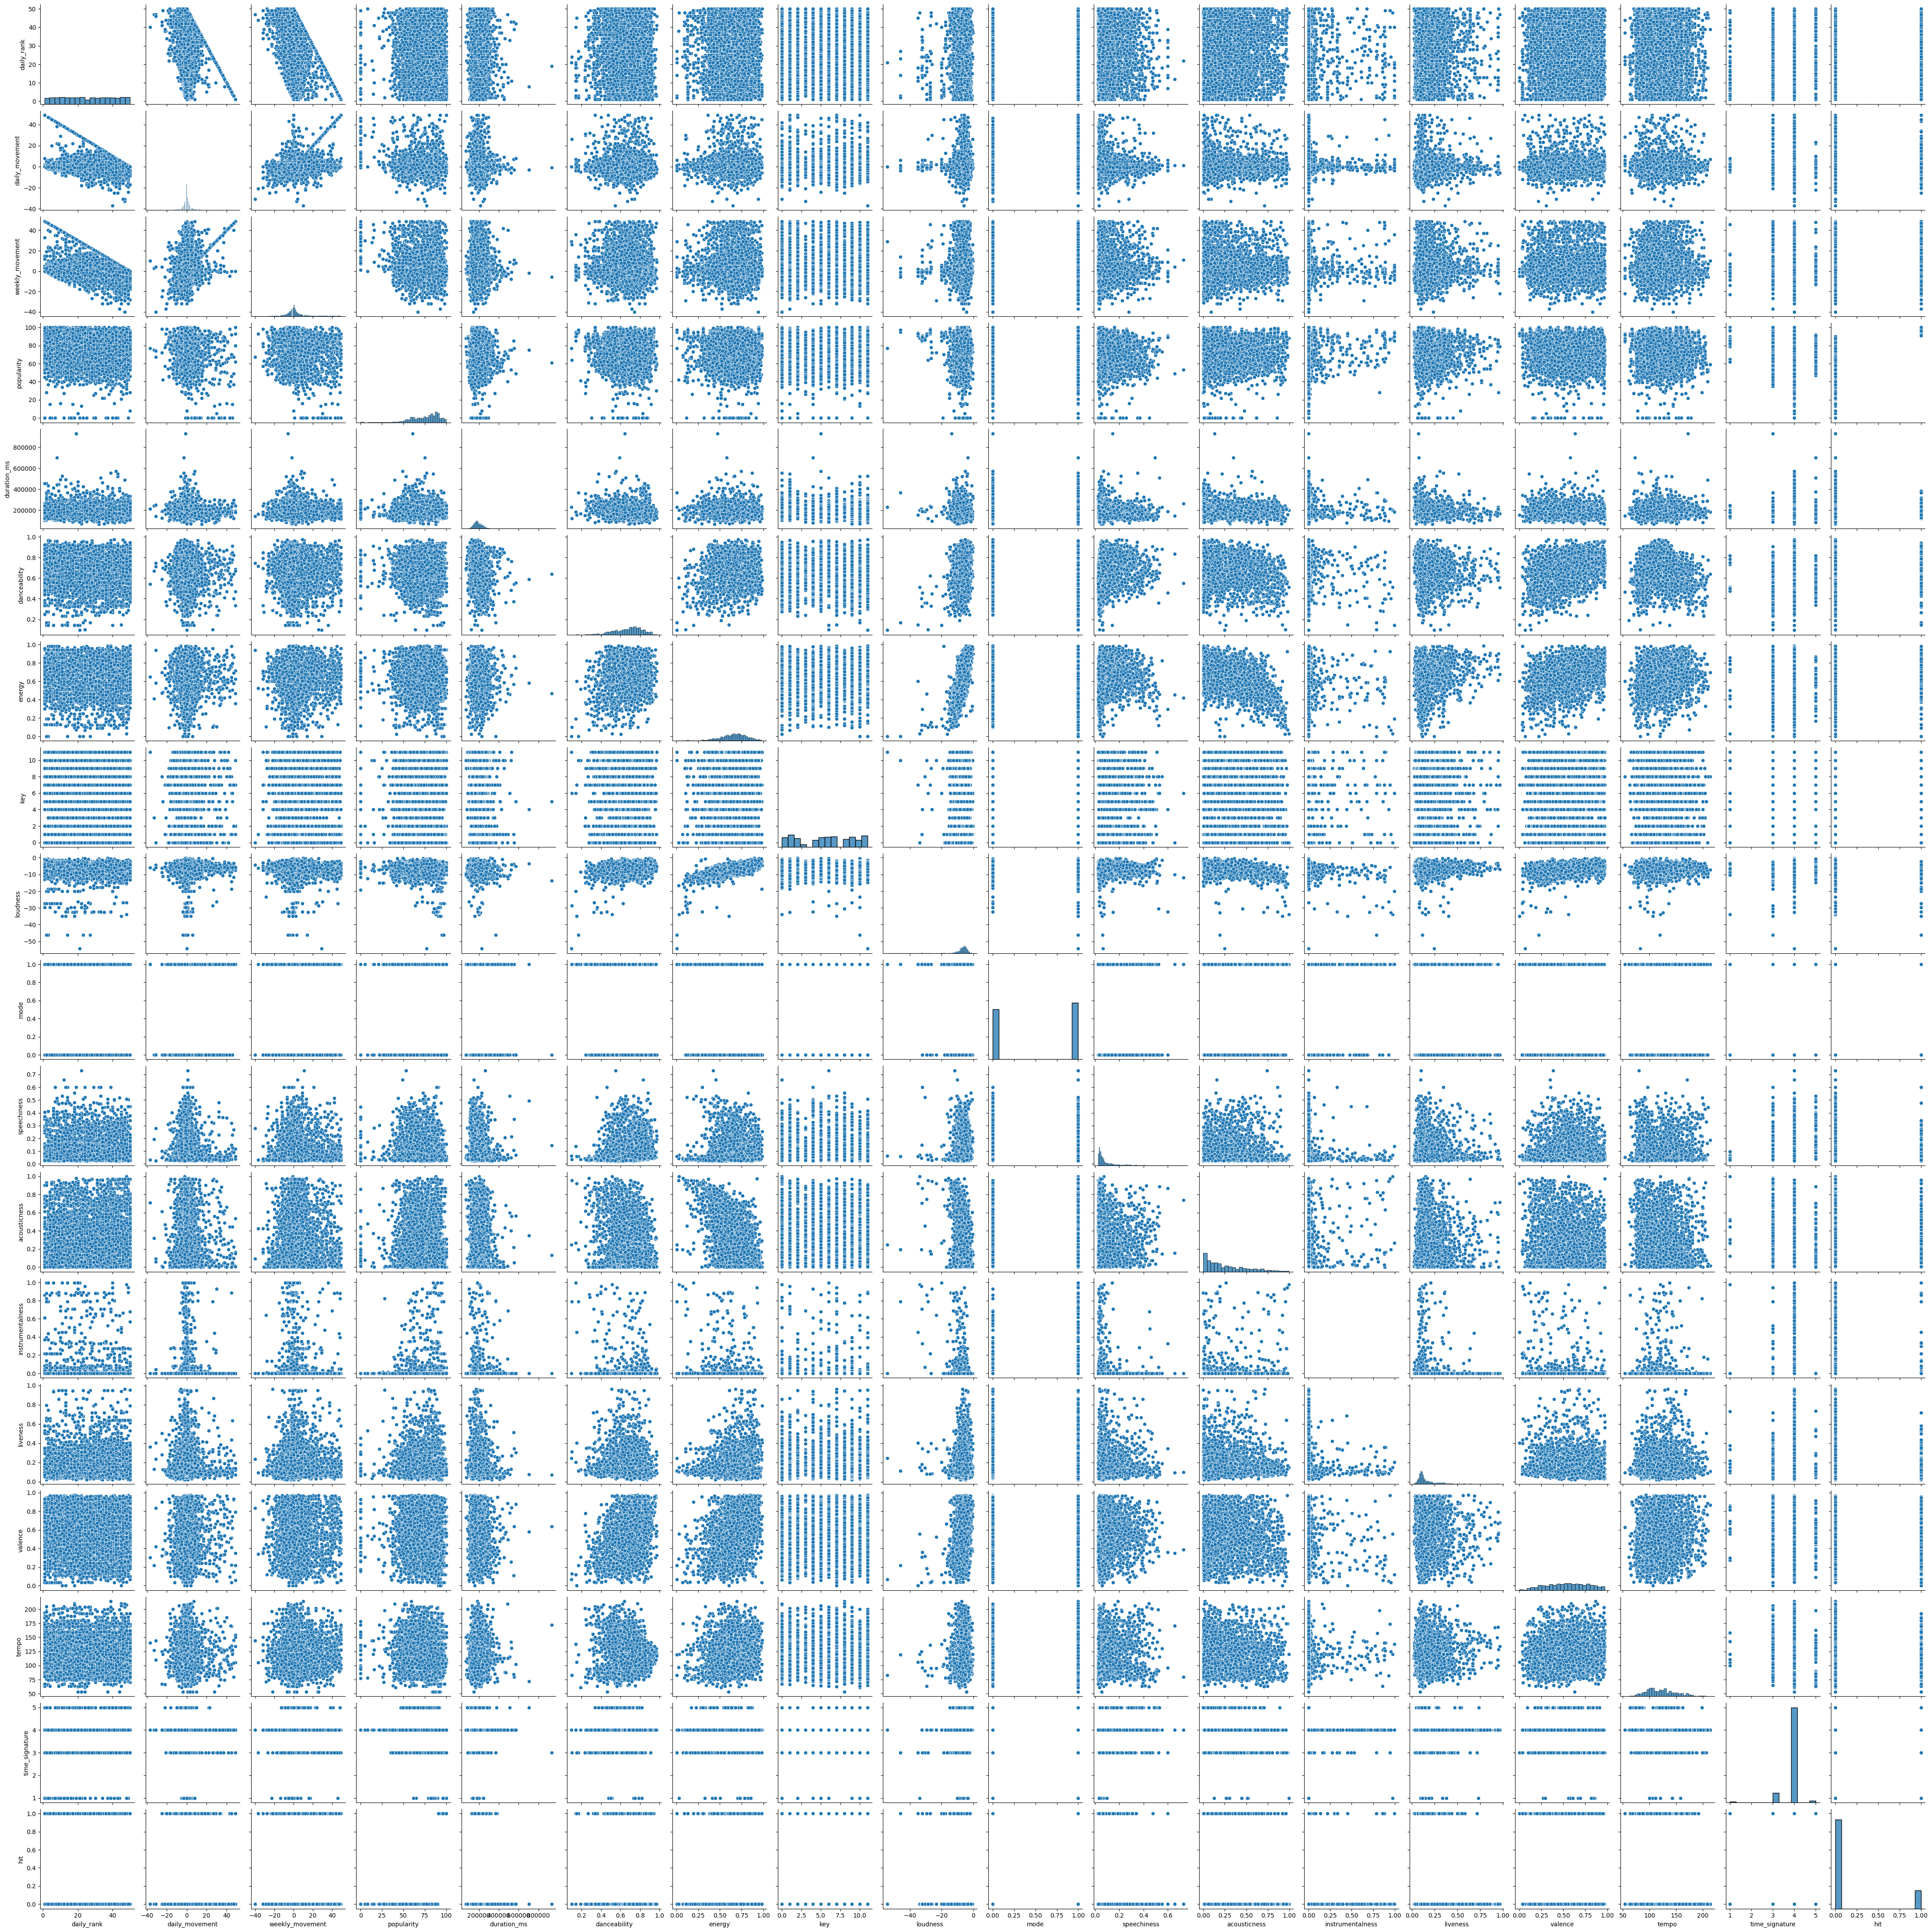

AttributeError: module 'matplotlib.pyplot' has no attribute 'titl'

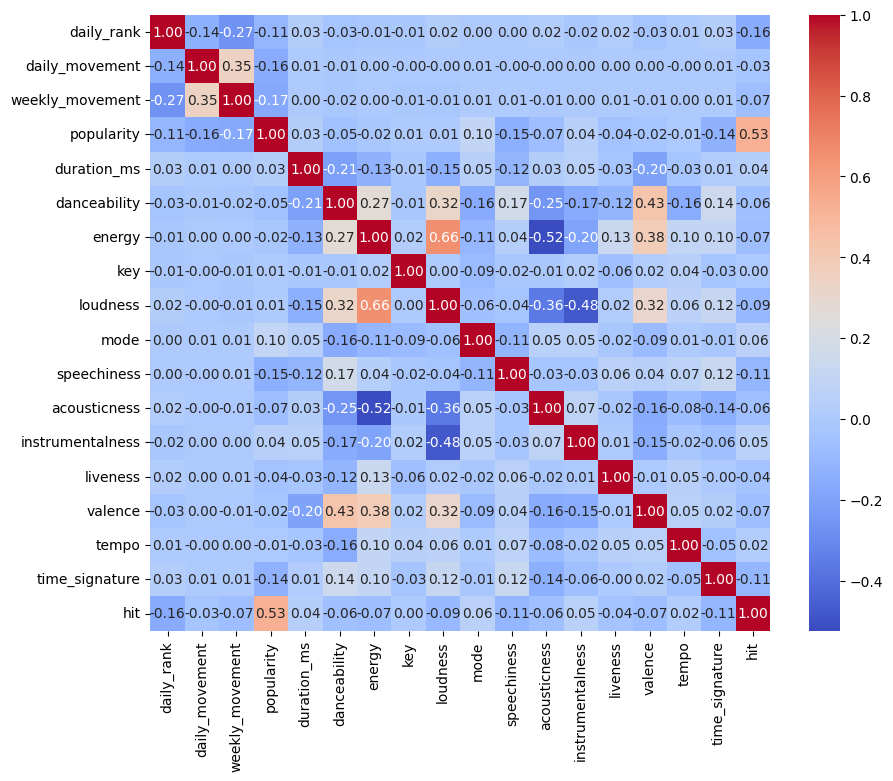

In [20]:
# Change infinite values to NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
print(data.isnull().sum())

# Ensure numeric_features is defined
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Pairplot with sample of 5000 rows
sample_data = data[numeric_features].sample(5000, random_state=42)
sns.pairplot(sample_data)
plt.savefig("eda_plot.png")
plt.show()


# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('graphs/correlation_matrix.png')  
plt.show()

# Histograms
for col in numeric_features:
    plt.figure()
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'graphs/histogram_{col}.png')
    plt.show()
    plt.close()







## Establishing the Target Variable

If a song's popularity score is greater than 90, we consider it a **"hit"**.

In [13]:
# Define hit
data['hit'] = data['popularity'].apply(lambda x: 1 if x > 90 else 0)
x = data[numeric_features]
y = data['hit']

from sklearn.model_selection import train_test_split
# Split data into a training dataset and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=1)

# Verification checks
print(f"Total number of samples: {len(data)}")
print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")
print(f"Hit rate (full data): {y.mean():.2%}")
print(f"Hit rate (training): {y_train.mean():.2%}")
print(f"Hit rate (test): {y_test.mean():.2%}")


Total number of samples: 2020319
Training set size: 1515239
Test set size: 505080
Hit rate (full data): 16.86%
Hit rate (training): 16.88%
Hit rate (test): 16.82%


## Model Building

We use Logistic Regression as our classifier.


In [14]:
from sklearn.linear_model import LogisticRegression
# Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Create results DataFrame 
results = pd.DataFrame({
    'name': data.loc[x_test.index, 'name'],  # Get names from original data
    'hit_probability': model.predict_proba(x_test)[:, 1],
    'actual_hit': y_test.values})  # Use values to avoid index issues

# Sort and display 
sorted_results = results.sort_values('hit_probability', ascending=False).reset_index(drop=True)
print("Top 20 predictions:")
print(sorted_results.head(20))

# Consistency check
is_consistent = True
for i in range(1, min(20, len(sorted_results))):  # Check only top 20
    prob1 = sorted_results.loc[i, 'hit_probability']
    prob0= sorted_results.loc[i-1, 'hit_probability']
    actual1 = sorted_results.loc[i, 'actual_hit']
    actual0 = sorted_results.loc[i-1, 'actual_hit']
    
    if (prob1 > prob0) and (actual1 < actual0):
        is_consistent = False
        print(f"Inconsistency found at row {i}")
        break

print("\nConsistency check:", "✅ Yes" if is_consistent else "❌ No")


Top 20 predictions:
                                 name  hit_probability  actual_hit
0                             vampire              1.0           1
1                            fukumean              1.0           1
2                    End of Beginning              1.0           1
3                   BAILE INoLVIDABLE              1.0           1
4                         Lovin On Me              1.0           1
5                    Good Luck, Babe!              1.0           1
6                           Gata Only              1.0           1
7                    Die With A Smile              1.0           1
8     All I Want for Christmas Is You              1.0           1
9                           Strangers              1.0           1
10                            Houdini              1.0           1
11                               DtMF              1.0           1
12                            Starboy              1.0           1
13                              QLONA     

## Predicting Manual User Input

We let users manually enter song values because Kaggle does not support the live Spotify API.

In [ ]:
print("\n Please enter the following music features:")

def float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except:
            print("Please enter a valid number.")

user_input = {'tempo': float_input("Tempo (e.g., 120.0): "),
    'danceability': float_input("Danceability (between 0 and 1): "),
    'popularity': float_input("Estimated popularity score (0-100): "),
    'loudness': float_input("Loudness (e.g., -5.0): "),
    'speechiness': float_input("Speechiness (between 0 and 1): "),
    'acousticness': float_input("Acousticness (between 0 and 1): "),
    'valence': float_input("Valence (between 0 and 1): "),
    'liveness': float_input("Liveness (between 0 and 1): "),
    'daily_movement': float_input("Daily Movement (e.g., 1.5): ")}

input_df = pd.DataFrame([user_input])



In [ ]:
# Make prediction
hit_prob = model.predict_proba(input_df)[:, 1][0]
hit_label = "✅ Might Be a Hit!" if hit_prob > 0.5 else "❌ Might Not Be a Hit"

# Display result
print(f"\n Predicted hit probability: {hit_prob * 100:.2f}%")
print(f" Prediction: {hit_label}")


## Findings and Insights

On test data, the model performs fairly well. Manual input is adaptable and enables user-driven prediction.

Features that affect hit potential include danceability and tempo.

### Future Developments: - Experiment with various models, such as Random Forest or XGBoost - Include artist popularity (if external APIs are permitted outside of Kaggle)